# Description

See description in notebook `10_00-spectral_clustering...`.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 100000

In [6]:
CLUSTERING_METHOD_NAME = "DeltaSpectralClustering"

In [7]:
# output dir for this notebook
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/consensus_clustering')

# Load data

In [8]:
INPUT_SUBSET = "umap"

In [9]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [10]:
DR_OPTIONS = {
    "n_components": 50,
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [11]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

'umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0'

In [12]:
data = pd.read_pickle(input_filepath)

In [13]:
data.shape

(3749, 50)

In [14]:
data.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP41,UMAP42,UMAP43,UMAP44,UMAP45,UMAP46,UMAP47,UMAP48,UMAP49,UMAP50
100001_raw-Food_weight,11.531590,10.773390,10.551500,5.689103,12.646474,8.795625,2.365859,-3.382425,1.458605,14.236823,...,2.214731,9.304909,3.359118,5.211676,1.265622,2.058685,1.291174,1.565621,7.317275,9.037535
100002_raw-Energy,11.554761,10.753816,10.548004,5.710800,12.674987,8.787647,2.379787,-3.339913,1.442655,14.196218,...,2.237087,9.270699,3.383440,5.185328,1.257113,2.057439,1.290686,1.557209,7.297037,9.009866
100003_raw-Protein,11.519615,10.786408,10.540249,5.687959,12.628188,8.789925,2.368370,-3.390937,1.464806,14.233623,...,2.216162,9.314158,3.350708,5.226166,1.267382,2.051692,1.305047,1.558942,7.307035,9.042575
100004_raw-Fat,11.515584,10.756584,10.570711,5.697041,12.661936,8.787330,2.396913,-3.351611,1.435632,14.221588,...,2.214707,9.273252,3.383349,5.220068,1.270067,2.065669,1.281447,1.578588,7.332527,9.005523
100005_raw-Carbohydrate,11.528723,10.762026,10.566773,5.698555,12.671127,8.791903,2.394764,-3.354370,1.442259,14.226301,...,2.216362,9.275563,3.383139,5.216354,1.269187,2.063429,1.280020,1.577227,7.335059,9.009464


In [15]:
traits = data.index.tolist()

In [16]:
len(traits)

3749

# Ensemble (coassociation matrix)

In [17]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "ensemble_coassoc_matrix.npy").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/consensus_clustering/ensemble_coassoc_matrix.npy')

In [18]:
coassoc_matrix = np.load(input_file)

In [19]:
coassoc_matrix = pd.DataFrame(
    data=coassoc_matrix,
    index=traits,
    columns=traits,
)

In [20]:
coassoc_matrix.shape

(3749, 3749)

In [21]:
coassoc_matrix.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
100001_raw-Food_weight,0.000000,0.056159,0.053895,0.076313,0.057518,0.075634,0.074728,0.057971,0.055480,0.567482,...,0.604223,0.602355,0.594564,0.603261,0.582428,0.548731,0.690641,0.599864,0.661714,0.667572
100002_raw-Energy,0.056159,0.000000,0.027400,0.044837,0.021966,0.045743,0.067482,0.031250,0.048007,0.561368,...,0.606040,0.604393,0.594337,0.606431,0.585824,0.571170,0.687644,0.601223,0.659886,0.665308
100003_raw-Protein,0.053895,0.027400,0.000000,0.046875,0.018116,0.047781,0.064764,0.032382,0.050951,0.558424,...,0.602634,0.601676,0.592525,0.603487,0.581975,0.571850,0.691102,0.597826,0.661029,0.662817
100004_raw-Fat,0.076313,0.044837,0.046875,0.000000,0.045516,0.004755,0.046196,0.028306,0.057971,0.551857,...,0.590372,0.589674,0.578256,0.595788,0.571332,0.585902,0.692254,0.588315,0.667429,0.666667
100005_raw-Carbohydrate,0.057518,0.021966,0.018116,0.045516,0.000000,0.046196,0.067935,0.025589,0.050045,0.559783,...,0.605813,0.604393,0.593205,0.604846,0.584692,0.574569,0.687414,0.600543,0.657143,0.662817


In [22]:
dist_matrix = coassoc_matrix

# Clustering

In [23]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

## Extended test

In [24]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_RANGE"] = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40]
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["DELTAS"] = [
    5.00,
    2.00,
    1.00,
    0.90,
    0.75,
    0.50,
    0.30,
    0.25,
    0.20,
]

display(CLUSTERING_OPTIONS)

{'K_RANGE': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40],
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'DELTAS': [5.0, 2.0, 1.0, 0.9, 0.75, 0.5, 0.3, 0.25, 0.2]}

## Generate ensemble

In [25]:
import tempfile

In [26]:
ensemble_folder = Path(
    tempfile.gettempdir(),
    f"pre_cluster_analysis",
    CLUSTERING_METHOD_NAME,
).resolve()
ensemble_folder.mkdir(parents=True, exist_ok=True)

In [27]:
ensemble_file = Path(
    ensemble_folder,
    generate_result_set_name(CLUSTERING_OPTIONS, prefix=f"ensemble-", suffix=".pkl"),
)
display(ensemble_file)

PosixPath('/tmp/pre_cluster_analysis/DeltaSpectralClustering/ensemble-DELTAS_50_20_10_09_075_05_03_025_02-KMEANS_N_INIT_10-K_RANGE_2_4_6_8_10_12_14_16_18_20_25_30_35_40-N_REPS_PER_K_5.pkl')

In [28]:
assert ensemble_file.exists(), "Ensemble file does not exists"

In [29]:
ensemble = pd.read_pickle(ensemble_file)

In [30]:
ensemble.shape

(630, 7)

In [31]:
ensemble.head()

,clusterer_params,partition,n_clusters,delta,si_score,ch_score,db_score
clusterer_id,,,,,,,
DeltaSpectralClustering #0,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,128.603203,4.388969
DeltaSpectralClustering #1,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,128.603203,4.388969
DeltaSpectralClustering #2,{'delta': 5.0},"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,5.00,0.242625,128.603203,4.388969
DeltaSpectralClustering #3,{'delta': 5.0},"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,5.00,0.242625,128.603203,4.388969
DeltaSpectralClustering #4,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,128.603203,4.388969


### Add clustering quality measures

In [32]:
ensemble = ensemble.assign(
    #     si_score=ensemble["partition"].apply(lambda x: silhouette_score(dist_matrix, x, metric="precomputed")),
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x)),
    db_score=ensemble["partition"].apply(lambda x: davies_bouldin_score(data, x)),
)

In [33]:
ensemble.shape

(630, 7)

In [34]:
ensemble.head()

,clusterer_params,partition,n_clusters,delta,si_score,ch_score,db_score
clusterer_id,,,,,,,
DeltaSpectralClustering #0,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,998.500292,1.411797
DeltaSpectralClustering #1,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,998.500292,1.411797
DeltaSpectralClustering #2,{'delta': 5.0},"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,5.00,0.242625,998.500292,1.411797
DeltaSpectralClustering #3,{'delta': 5.0},"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,5.00,0.242625,998.500292,1.411797
DeltaSpectralClustering #4,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,998.500292,1.411797


# Cluster quality

In [35]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters", "delta"]).mean()
    display(_df)

si_score     ch_score  db_score
n_clusters delta                                 
2          0.20   0.427525  2723.248571  0.118866
           0.25   0.428439  2610.357289  0.119332
           0.30   0.428439  2610.357289  0.119332
           0.50   0.263322  1140.269202  1.317186
           0.75   0.252516  1047.864364  1.374280
           0.90   0.249902  1033.424832  1.383773
           1.00   0.248749  1027.914271  1.387437
           2.00   0.244404  1003.662332  1.406255
           5.00   0.242625   998.500292  1.411797
4          0.20   0.382459  1995.227822  0.105354
           0.25   0.383548  1311.135387  0.246777
           0.30   0.424656   870.219751  1.054019
           0.50   0.199576  1393.124076  1.705055
           0.75   0.184060  1290.280940  2.098243
           0.90   0.183101  1304.767246  2.106755
           1.00   0.180977  1302.215313  2.160579
           2.00   0.180781  1780.280388  2.127145
           5.00   0.180488  1856.743861  2.125580
6          0.20   0.278484  1578.559110  0.383715
           0.25   0.277664  1608.262346  0.385213
           0.30   0.276948  1044.914204  0.928878
           0.50   0.064235   943.281712  3.044384
           0.75   0.068344   917.130404  2.596838
           0.90   0.068433   921.402268  2.590604
           1.00   0.068581   926.449547  2.587025
           2.00   0.069271  1217.175148  2.727085
           5.00   0.069425  1411.534848  2.647507
8          0.20   0.374526   884.830988  0.557947
           0.25   0.378640   884.404473  0.777336
           0.30   0.235342  1093.655994  0.917945
           0.50   0.076589   692.119089  2.927989
           0.75   0.075782   667.469516  2.939712
           0.90   0.071693   691.858817  3.039960
           1.00   0.070781   674.264534  3.108126
           2.00   0.072265   871.031729  3.342265
           5.00   0.072009  1009.834762  3.323499
10         0.20   0.357620   687.222819  0.519428
           0.25   0.222965   778.646447  1.022792
           0.30   0.246032   893.451091  1.027049
           0.50   0.079614   531.309351  3.134994
           0.75   0.076941   489.946986  3.504413
           0.90   0.077102   489.788528  3.513530
           1.00   0.076801   491.048713  3.512288
           2.00   0.072286   534.008231  4.106945
           5.00   0.072967   860.842120  3.809815
12         0.20   0.227325   600.209083  0.856286
           0.25   0.237612   600.083113  0.940156
           0.30   0.163992   781.335292  1.519560
           0.50   0.083869   828.201246  3.297417
           0.75   0.079932   448.582670  3.640872
           0.90   0.079344   446.508872  3.693503
           1.00   0.079175   446.548257  3.697356
           2.00   0.078788   501.886519  3.706099
           5.00   0.080214   728.617604  3.691758
14         0.20   0.274823   482.561355  0.674831
           0.25   0.238917   513.905320  0.846461
           0.30   0.141021   666.837360  1.472154
           0.50   0.085860   728.236199  3.462205
           0.75   0.085094   451.198961  4.002142
           0.90   0.084411   444.204063  3.996936
           1.00   0.084417   440.720645  3.980576
           2.00   0.082363   399.768191  3.750880
           5.00   0.084238   500.246486  3.694477
16         0.20   0.211533   437.349837  0.828370
           0.25   0.232423   450.815126  0.827487
           0.30   0.162359   604.936170  1.518580
           0.50   0.100239   687.014634  2.886026
           0.75   0.097533   427.986822  3.554180
           0.90   0.097785   419.076928  3.279546
           1.00   0.096574   416.655493  3.586737
           2.00   0.093288   395.521308  3.934503
           5.00   0.096695   392.318785  3.431806
18         0.20   0.212348   391.342165  0.881602
           0.25   0.232169   400.490187  0.908988
           0.30   0.105787   567.819877  1.743468
           0.50   0.107428   688.957515  2.804763
           0.75   0.106236   518.583882  3.044675
           0.90   0.106723   389.714413  3.120162
           1.00   

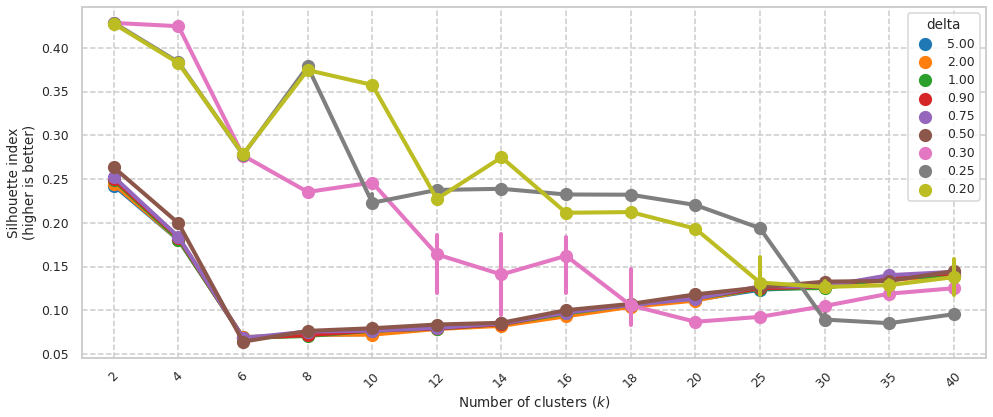

In [36]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="si_score", hue="delta")
    ax.set_ylabel("Silhouette index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

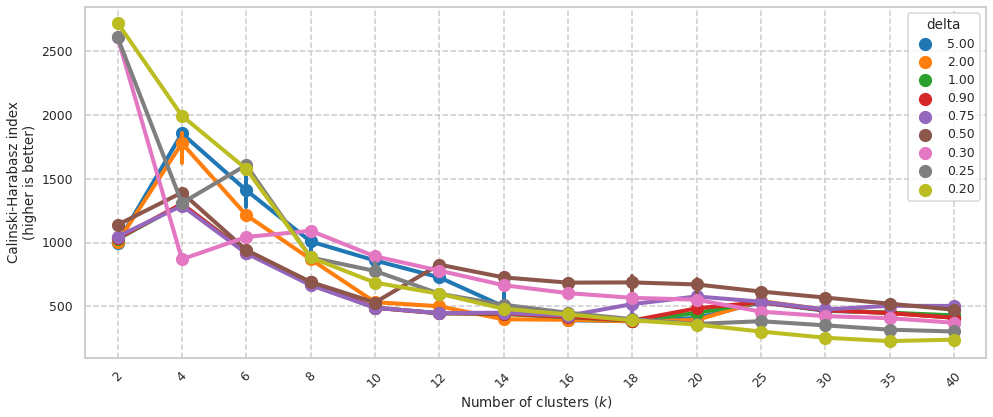

In [37]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score", hue="delta")
    ax.set_ylabel("Calinski-Harabasz index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

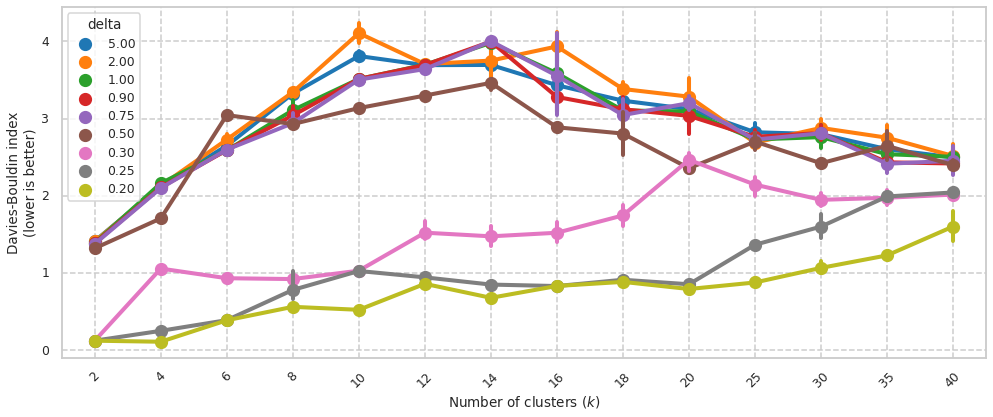

In [38]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="db_score", hue="delta")
    ax.set_ylabel("Davies-Bouldin index\n(lower is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()